# Goal 
- Input: 
    - 1 Normal image, 
    - 1 clockwise tilted image, 
    - 1 anticlock wise tilted image
- Output: detect the angle and re-tilt an image for correction

STEPS IMPLEMENTED:
1. Explaination of Canny edges detections and Hough lines detections
2. Calculation of angle of tilt in an image
3. Correction in angle of an image

THIS CAN BE USED:
1. for the applications where we need normal image and not the tilted ones. For example in case of Tesseract OCR with increase in tilt angle of an image the output accuracy decreases. Therefore removing tilt is necessary in such cases

In [1]:
import PIL
print("PIL version:", PIL.__version__)
import PIL.Image as Image
import cv2         #for canny edge detection and hough line detection algorithm
print("opencv version:", cv2.__version__)
import numpy as np
print("Numpy version is:", np.__version__)

import matplotlib.pyplot as plt
%matplotlib inline 
#inline to print in the notebook itself

import scipy   # to add black bordered tilt to an image
print('scipy version:', scipy.__version__)   

PIL version: 4.2.1
opencv version: 4.1.0
Numpy version is: 1.17.0
scipy version: 0.19.1


In [2]:
# function frequently used in the code
def display_image(image):
    plt.close()    #1st closing previously opened image to clean the memory
    plt.figure(figsize=(8,8))  #increase the size of the new image
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.show()


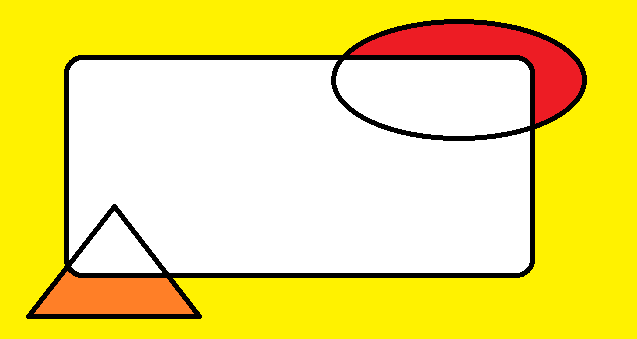

In [3]:
image = Image.open('DemoImage.png') #read image
image  #print the image

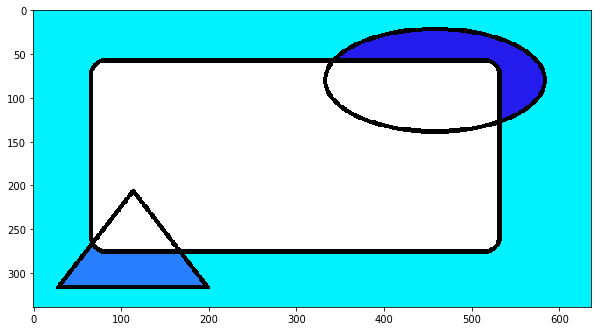

In [4]:
image = cv2.imread('DemoImage.png')
display_image(image)

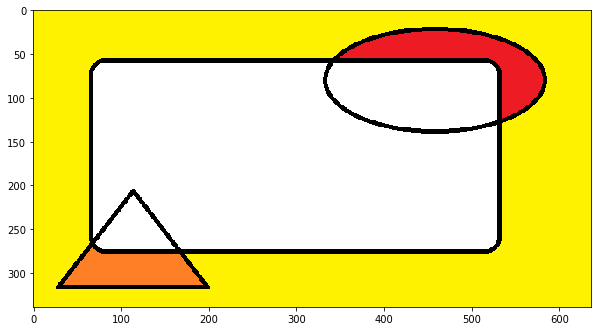

In [5]:
image = cv2.imread('DemoImage.png') 

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #convert BGR to RGB
display_image(image)

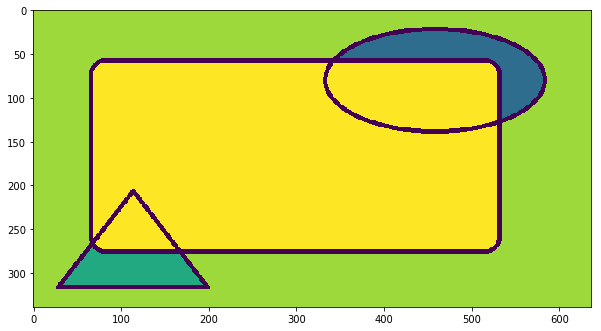

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #cv2.COLOR_RGB2GRAY
display_image(gray)# since OpenCV wierd behaviour bacuse of BGR  to RGB or Gray convertion

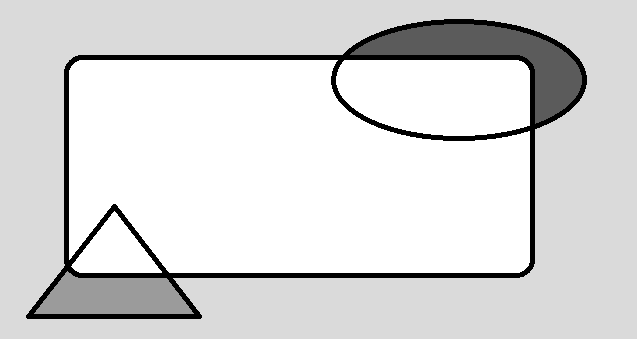

In [7]:
Image.fromarray(gray)  #if we print the same image then we can see gray image is:

# Applying canny edge detection:
example: cv2.Canny(img_gray, 100, 100, apertureSize=3)
(input_image, minVal, maxVal, aperture_size(the size of Sobel kernel used for find image gradients, By default it is 3), L2gradient: equation for finding gradient magnitude)


#### aperture_size: 
 - It is the size of Sobel kernel used for find image gradients. By default it is 3. 
 - Aperture size should be odd between 3 and 7 in function 'Canny'

#### Last argument is L2gradient 
 - which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge\_Gradient \; (G) = |G_x| + |G_y|. By default, it is False.


### In cv2.Canny() following STEPS  are IMPLEMENTED:
1. Noise Reduction:
    - Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter.
2. Finding Intensity Gradient of the Image
    - Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction (G_x) and vertical direction (G_y). 
3. Non-maximum Suppression: 
    - the result you get is a binary image with “thin edges”.
4. Hysteresis Thresholding
    - This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded.
    
For more details please refer: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

In [8]:
def apply_canny_edge_detection_algorithm(img_gray, img_before):
    
    #4. Applying Canny Edge detection
    #img_gray = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)
    img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)
    #cv2.Canny Function: The function finds edges in the input image image and marks them 
    #in the output map edges using the Canny algorithm. 
    #The smallest value between threshold1 and threshold2 is used for edge linking. 
    #The largest value is used to find initial segments of strong edges. 
    return img_edges

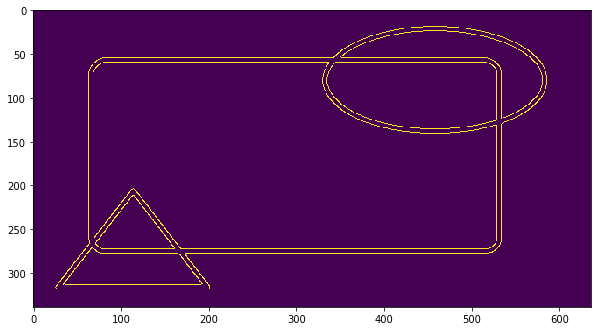

In [9]:
img_edges = apply_canny_edge_detection_algorithm(img_gray=gray, img_before=image)
display_image(img_edges)   #(img_gray, 100, 100, apertureSize=3)

# Now on this we will apply Hough Lines
    - returns ( rho (p) and theta (angle in radians))
    - Parameters: (binary_image, rho, theta, threshold (minimum vote (number of points) or minimum len to consider as a line))
1. First parameter, Input image should be a binary image, so apply threshold or use canny edge detection before finding applying hough transform. 
2. Second and third parameters are \rho and \theta accuracies respectively. 
3. Fourth argument is the threshold, which means minimum vote it should get for it to be considered as a line. Remember, number of votes depend upon number of points on the line. So it represents the minimum length of line that should be detected.

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

In [10]:
import math

In [11]:
# detecting the lines in an image
def find_lines_using_hough_lines(img_edges):
    
    #5. Applying Hough LinesP: 

    
    lines = cv2.HoughLines(img_edges, 1, math.pi / 180.0, 100)
    #Hough Transform is a popular technique to detect any shape, if you can represent that shape
    #in mathematical form. It can detect the shape even if it is broken or distorted a little bit. 
    
    #returns ( rho (p) and theta (angle in radians))
    #(binary_image, rho, theta, threshold (minimum vote (number of points) or minimum len to consider as a line))
    
    return lines


In [12]:
lines = find_lines_using_hough_lines(img_edges)
print(lines)

[[[272.          1.5707964]]

 [[277.          1.5707964]]

 [[ 59.          1.5707964]]

 [[ 54.          1.5707964]]

 [[ 63.          0.       ]]

 [[ 68.          0.       ]]

 [[529.          0.       ]]

 [[534.          0.       ]]

 [[318.          1.5707964]]

 [[313.          1.5707964]]

 [[214.          0.6632251]]

 [[ 51.          1.5882496]]

 [[ 35.          2.4783676]]

 [[219.          0.6632251]]

 [[ 61.          1.553343 ]]

 [[279.          1.553343 ]]

 [[270.          1.5882496]]

 [[ 40.          2.4783676]]]


# Now on this we will apply Hough LinesP
     - returns ( rho (p) and theta (angle in radians))
     - Parameters: (binary_image, rho, theta, threshold (minimum vote (number of points) or minimum len to consider as a line), 
    minLineLength: Line segments shorter than this are rejected, 
    maxLineGap: Maximum allowed gap between line segments to treat them as single line)
    
##### Probabilistic Hough Transform
In the hough transform, you can see that even for a line with two arguments, it takes a lot of computation. Probabilistic Hough Transform is an optimization of Hough Transform we saw. It doesn’t take all the points into consideration, instead take only a random subset of points and that is sufficient for line detection. Just we have to decrease the threshold. See below image which compare Hough Transform and Probabilistic Hough Transform in hough space.

- minLineLength - Minimum length of line. Line segments shorter than this are rejected.
- maxLineGap - Maximum allowed gap between line segments to treat them as single line.
returns ( rho (p) and theta (angle in radians))
(binary_image, rho, theta, threshold (minimum vote (number of points) or minimum len to consider as a line), 
    minLineLength: Line segments shorter than this are rejected, 
    maxLineGap: Maximum allowed gap between line segments to treat them as single line)


In [13]:
# detecting the lines in an image
def find_lines_using_hough_lines(img_edges):
    
    #5. Applying Hough LinesP: 

    
    lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)
    #Hough Transform is a popular technique to detect any shape, if you can represent that shape
    #in mathematical form. It can detect the shape even if it is broken or distorted a little bit. 
    
    #returns ( rho (p) and theta (angle in radians))
    #(binary_image, rho, theta, threshold (minimum vote (number of points) or minimum len to consider as a line), 
    # minLineLength: Line segments shorter than this are rejected, 
    # maxLineGap: Maximum allowed gap between line segments to treat them as single line)
    
    return lines


In [14]:
linesP = find_lines_using_hough_lines(img_edges)
print(linesP)

[[[ 79  54 343  54]]

 [[173 277 520 277]]

 [[ 80  59 337  59]]

 [[168 272 520 272]]

 [[ 63 268  63  70]]

 [[534 264 534 130]]

 [[ 68 259  68  71]]

 [[ 26 318 201 318]]

 [[529 263 529  69]]

 [[ 27 313 191 313]]

 [[ 34 312 117 206]]]


# Calculating the angle of an image:
- since this image is not tilted then output should be 0

In [15]:
def calculate_angle(lines, img_before):
    angles = []
#    print('Lines:', lines)
    for x1, y1, x2, y2 in lines[0]:
#        print('In lines we have x1, y1, x2, y2:',x1, y1, x2, y2)
        
        #Drawing lines
        cv2.line(img_before, (x1, y1), (x2, y2), (255, 0, 0), 3)
        # The function line draws the line segment between pt1 (x1) and pt2(y1) points in the image. 
        #The line is clipped by the image boundaries. 
        
        #calculating tilt angle
        angle = math.degrees(math.atan2(y2 - y1, x2 - x1))  # find angle of line connecting (0,0) to (x,y) from +ve x axis
        #The Math.atan2() function returns the angle in the plane (in radians) 
        #between the positive x-axis and the ray from (0,0) to the point (x,y), for Math.atan2(y,x)
        #atan2(y, x) returns value of atan(y/x) in radians. The atan2() method returns a numeric 
        #value between – and representing the angle of a (x, y) point and positive x-axis.
        print('Tilt angle for x1, y1, x2, y2 {} is {}'.format([x1, y1, x2, y2], angle) )
        angles.append(angle)
        
    median_angle = np.median(angles)
    print('median_angle:', median_angle)
    return median_angle

In [16]:
calculate_angle(lines =linesP, img_before = image)

Tilt angle for x1, y1, x2, y2 [79, 54, 343, 54] is 0.0
median_angle: 0.0


0.0

# Building End-to-End Auto tilt detector in input images

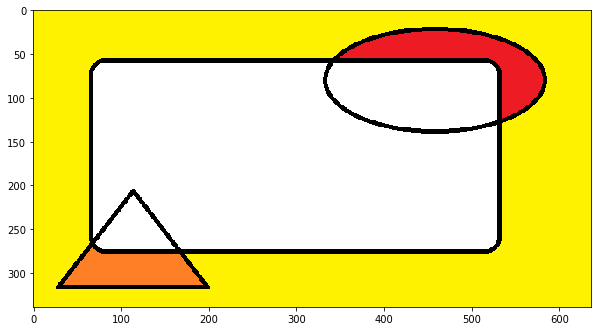

In [17]:
image = cv2.imread('DemoImage.png') 

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  #convert BGR to RGB
display_image(image)

In [18]:
NoTiltImage = image

In [19]:
import imutils # to rotate image

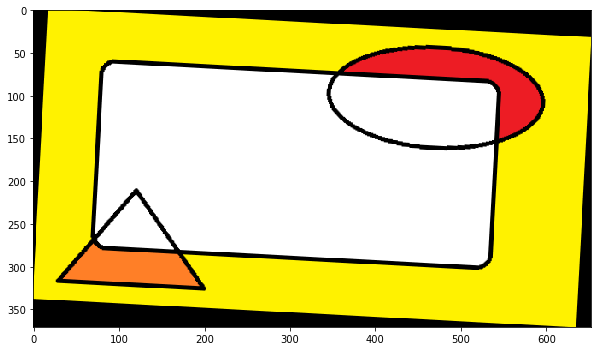

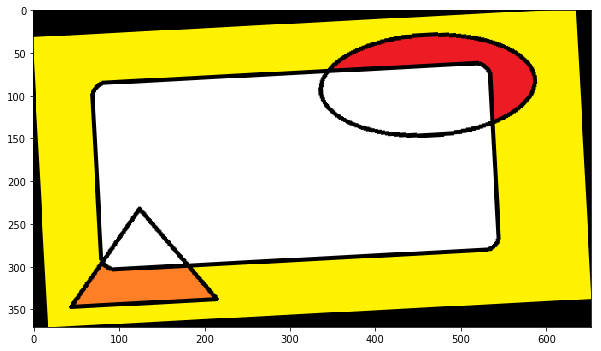

In [20]:
tiltClockWise = imutils.rotate_bound(image, 3)
display_image(tiltClockWise)
tiltAntiClockWise = imutils.rotate_bound(image, -3)
display_image(tiltAntiClockWise)

In [21]:
# NOTE: After introduction of tilt we can see in the black colour is padded

In [22]:
def auto_tilt_detection(image):
    #1. convert image to gray colour
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #cv2.COLOR_RGB2GRAY
    #2. apply cany edge detection
    img_edges = apply_canny_edge_detection_algorithm(img_gray=gray, img_before=image)
    display_image(img_edges)   #(img_gray, 100, 100, apertureSize=3)
    #3. apply Hough lines detection
    linesP = find_lines_using_hough_lines(img_edges)
    print(linesP)
    #4. Calculate angle
    img_before = image
    median_angle = calculate_angle(linesP, img_before)
    
    return median_angle
    
def correction_in_an_image(image):
    # detect tilt angle in an image
    median_angle = auto_tilt_detection(image)
    # correction
    image = imutils.rotate_bound(image, -median_angle)
    print("image after correction:")
    display_image(image)
    

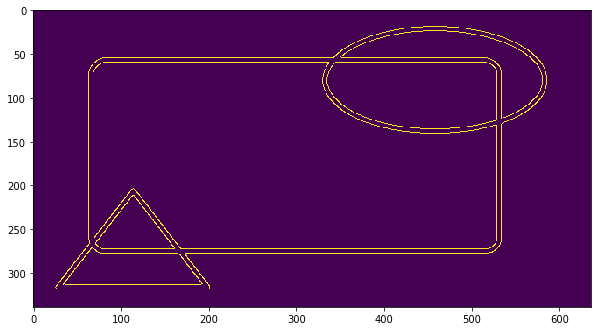

[[[ 79  54 343  54]]

 [[173 277 520 277]]

 [[ 80  59 337  59]]

 [[168 272 520 272]]

 [[ 63 268  63  70]]

 [[534 264 534 130]]

 [[ 68 259  68  71]]

 [[ 26 318 201 318]]

 [[529 263 529  69]]

 [[ 27 313 191 313]]

 [[ 34 312 117 206]]]
Tilt angle for x1, y1, x2, y2 [79, 54, 343, 54] is 0.0
median_angle: 0.0
image after correction:


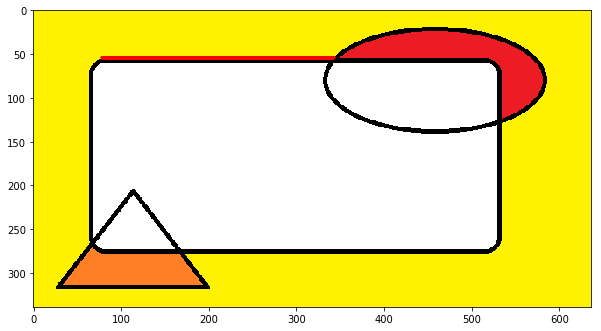

In [23]:
correction_in_an_image(NoTiltImage)

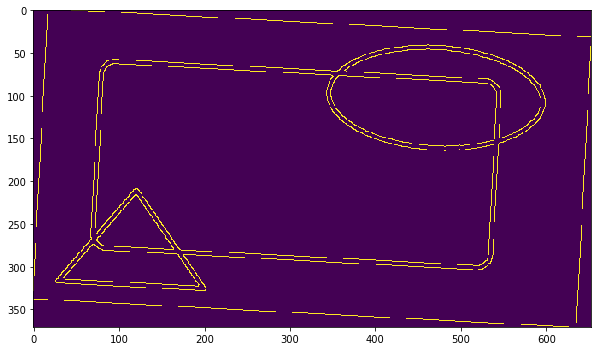

[[[374 357 625 370]]

 [[ 30   0 652  32]]

 [[176 286 521 304]]

 [[357  77 532  86]]

 [[366  72 533  81]]

 [[171 280 522 299]]

 [[  0 328  17   0]]

 [[635 370 652  43]]

 [[ 67 269  77  72]]

 [[ 72 262  82  73]]

 [[ 27 319 201 328]]

 [[ 26 317 120 209]]

 [[532 290 542  96]]

 [[ 38 315 193 323]]

 [[ 35 313 124 211]]

 [[  0 338 252 351]]

 [[ 92  58 356  72]]

 [[ 93  63 348  76]]]
Tilt angle for x1, y1, x2, y2 [374, 357, 625, 370] is 2.9648613091602183
median_angle: 2.9648613091602183
image after correction:


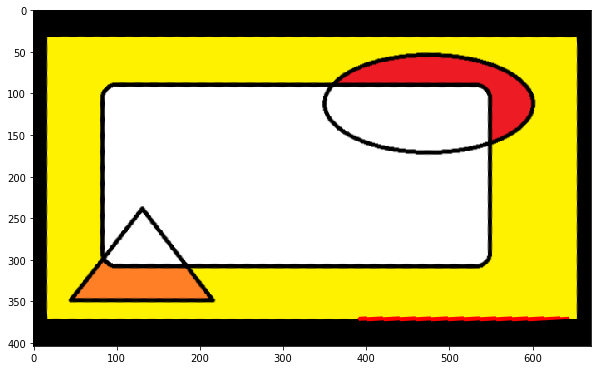

In [24]:
correction_in_an_image(tiltClockWise)  # detected tilt 2.96 ~ 3 degrees

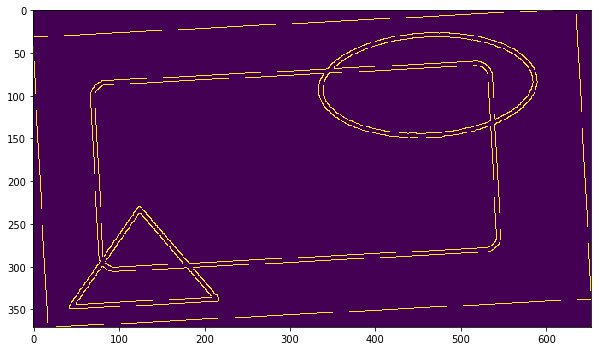

[[[  0  32 106  27]]

 [[ 27 370 652 338]]

 [[182 296 323 289]]

 [[323 294 500 285]]

 [[ 82  88 339  75]]

 [[ 80  83 342  70]]

 [[107  27 301  17]]

 [[635   0 652 327]]

 [[  5 137  17 370]]

 [[532  75 542 268]]

 [[ 72 102  80 256]]

 [[ 67  97  77 297]]

 [[379 286 532 278]]

 [[125 238 214 341]]

 [[ 50 344 209 336]]

 [[188 301 305 295]]

 [[314  16 626   0]]

 [[ 54 338 124 238]]]
Tilt angle for x1, y1, x2, y2 [0, 32, 106, 27] is -2.7006293373952883
median_angle: -2.7006293373952883
image after correction:


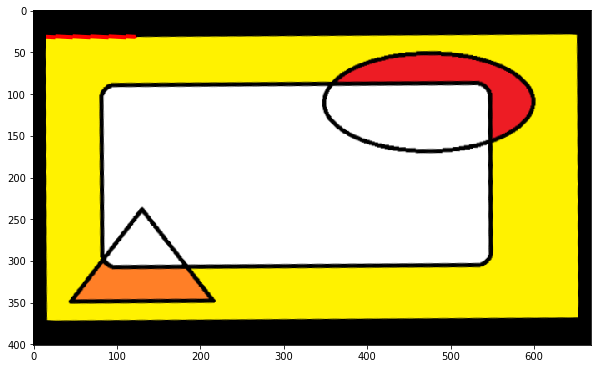

In [25]:
correction_in_an_image(tiltAntiClockWise)  # detected tilt -2.7 ~ -3 degrees

#### Note that at the time of introduction of tilt black paddin get introduced therefore we can see it in the output as well